First few rows of the dataset:
      video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0         22.0  2017-11-13T17:13:01.000Z   
1         24.0  2017-11-13T07:30:00.000Z   
2         23.0  2017-11-12T19:05:24.000Z   
3         24.0  2017-11-13T11:00:04.000Z   
4         24.0  2017-11-12T18:01:41.000Z   

                                    

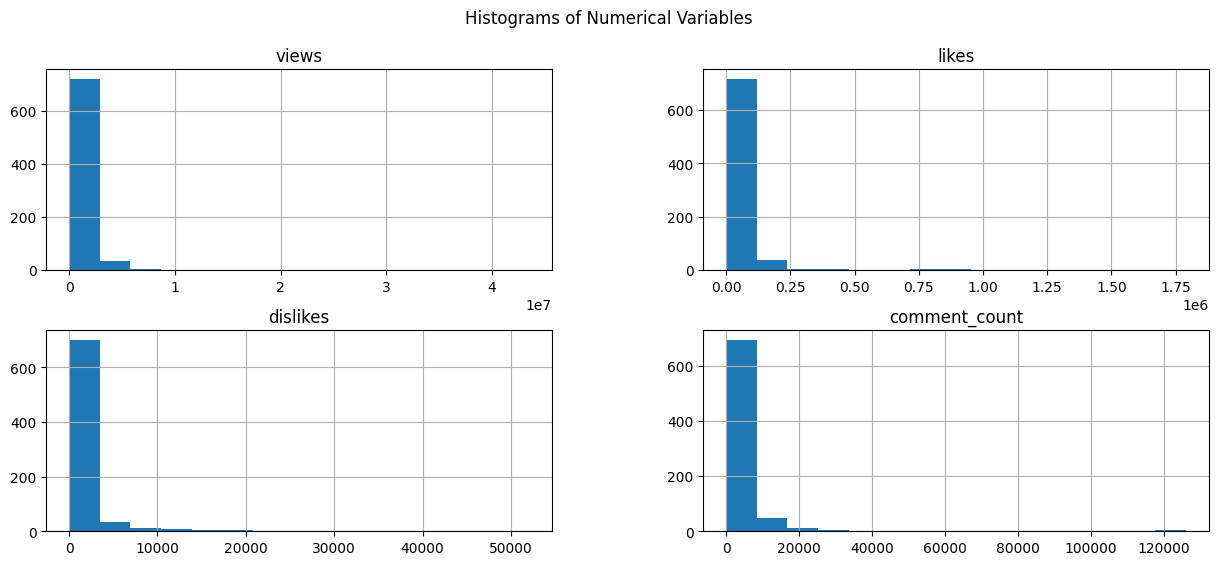

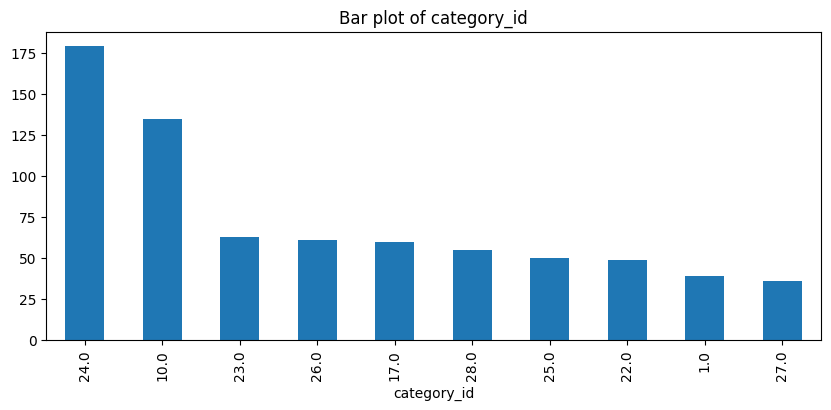

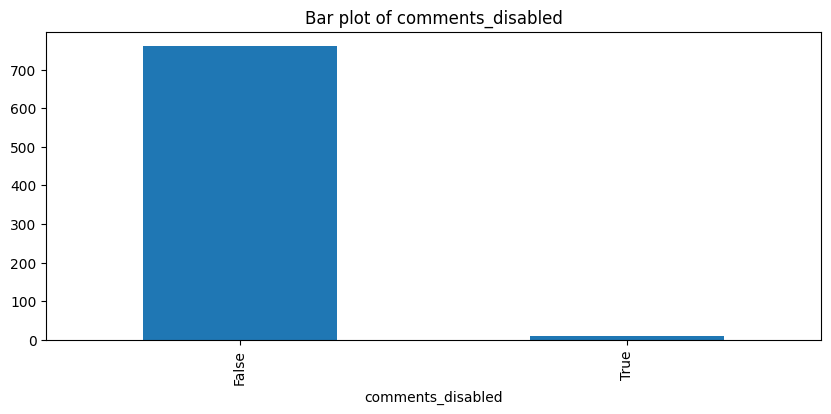

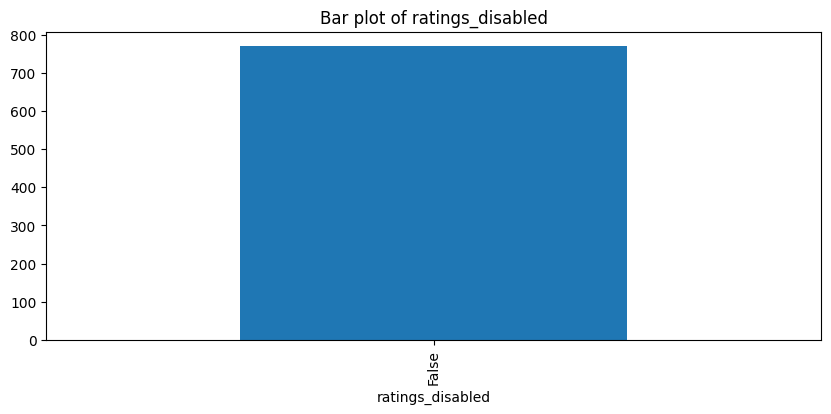

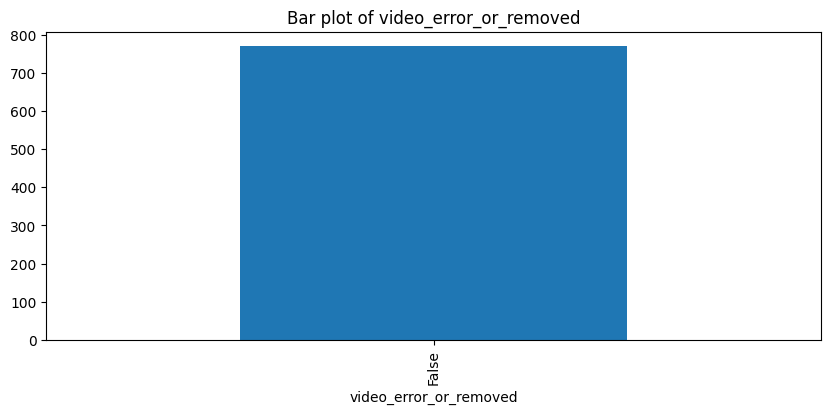

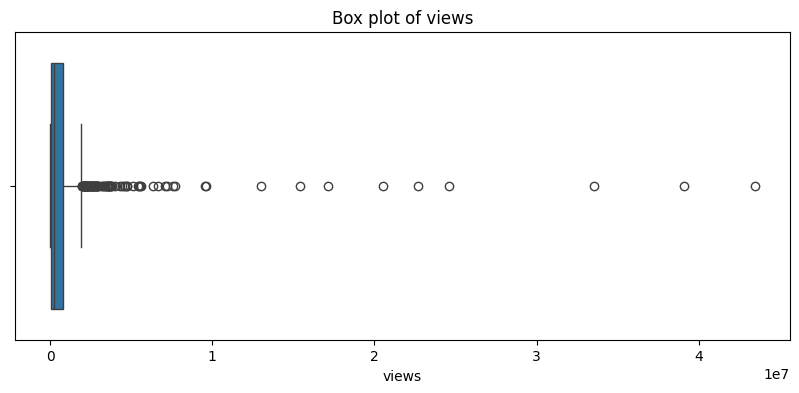

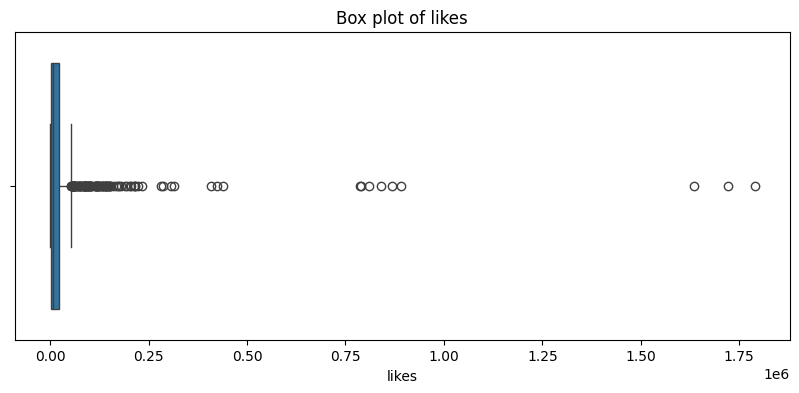

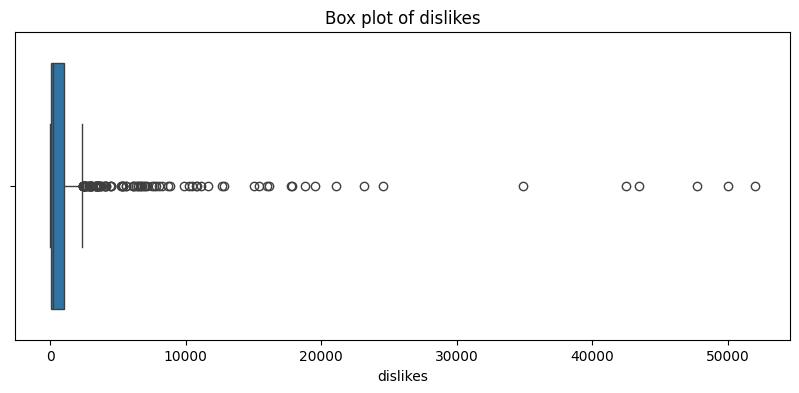

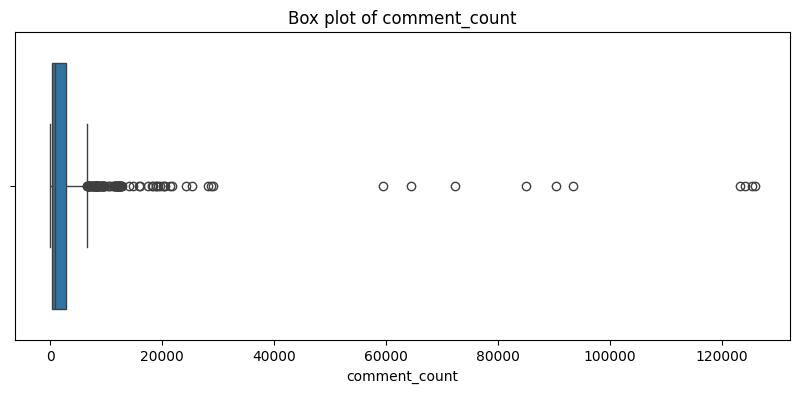

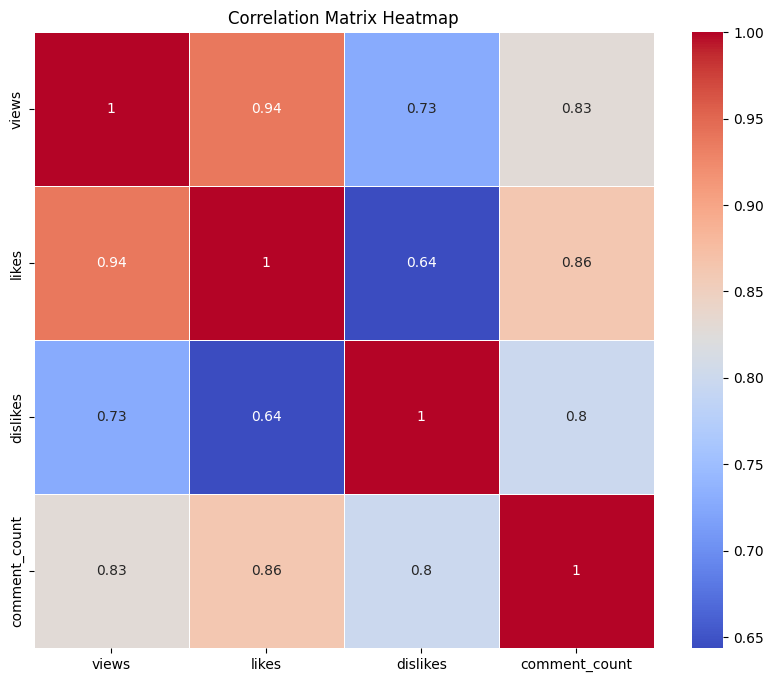

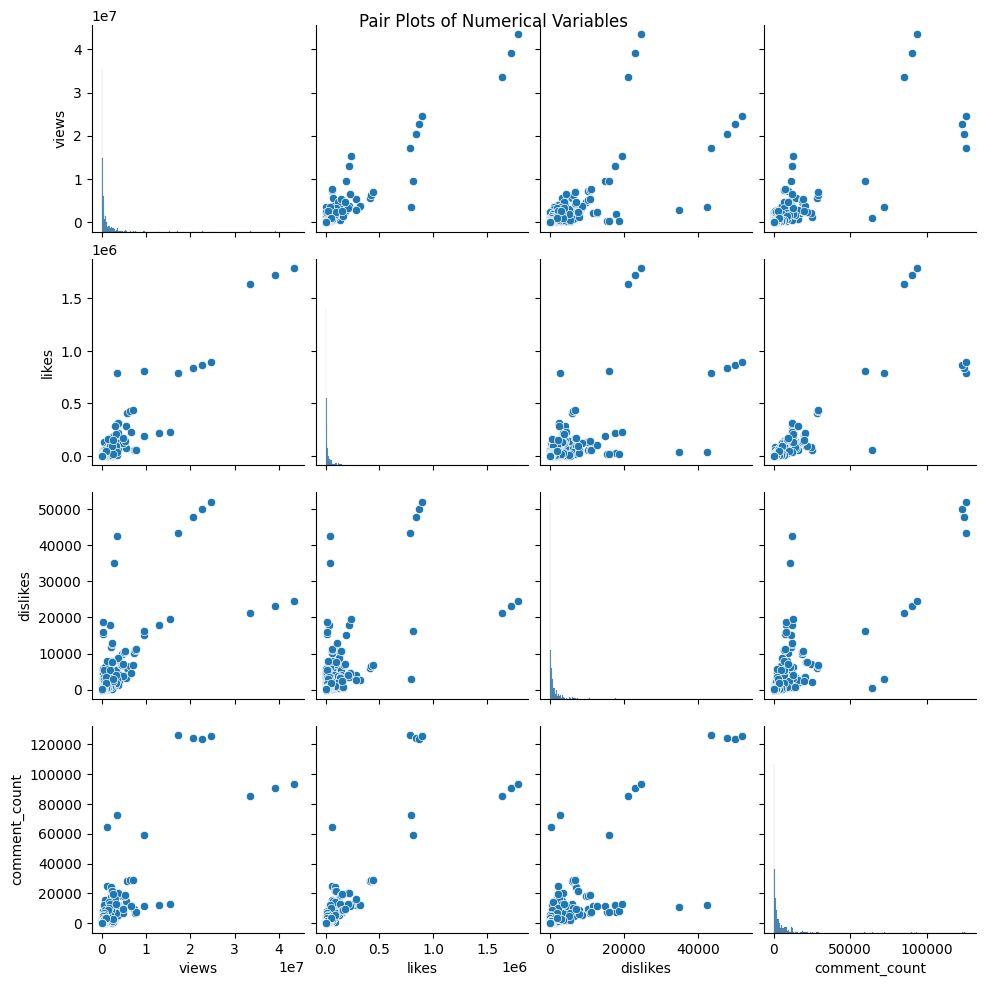


Number of outliers in each observation (Z-score > 3):
0      0
1      0
2      0
3      0
4      0
      ..
765    0
766    4
767    0
768    0
769    0
Length: 770, dtype: int64

Number of outliers in each numerical variable (IQR method):
views             93
likes            113
dislikes         103
comment_count    104
dtype: int64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('USvideos.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Summary statistics of numerical features
print("\nSummary statistics of numerical features:")
print(df.describe())

# Summary statistics of categorical features
print("\nSummary statistics of categorical features:")
print(df.describe(include=['object']))

# Histograms for numerical variables
numerical_cols = ['views', 'likes', 'dislikes', 'comment_count']
df[numerical_cols].hist(bins=15, figsize=(15, 6), layout=(2, 2))
plt.suptitle('Histograms of Numerical Variables')
plt.show()

# Bar plots for categorical variables
categorical_cols = ['video_id', 'trending_date', 'title', 'channel_title', 'category_id', 'publish_time', 'tags', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed']
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Bar plot of {col}')
    plt.show()

# Box plots to identify outliers
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

# Correlation matrix with heatmap
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Pair plots to visualize relationships between numerical variables
sns.pairplot(df[numerical_cols])
plt.suptitle('Pair Plots of Numerical Variables')
plt.show()

# Outlier detection using Z-score
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df[numerical_cols].dropna()))
outliers = (z_scores > 3).sum(axis=1)
print(f"\nNumber of outliers in each observation (Z-score > 3):\n{outliers}")

# Outlier detection using IQR
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).sum()
print(f"\nNumber of outliers in each numerical variable (IQR method):\n{outliers_iqr}")
